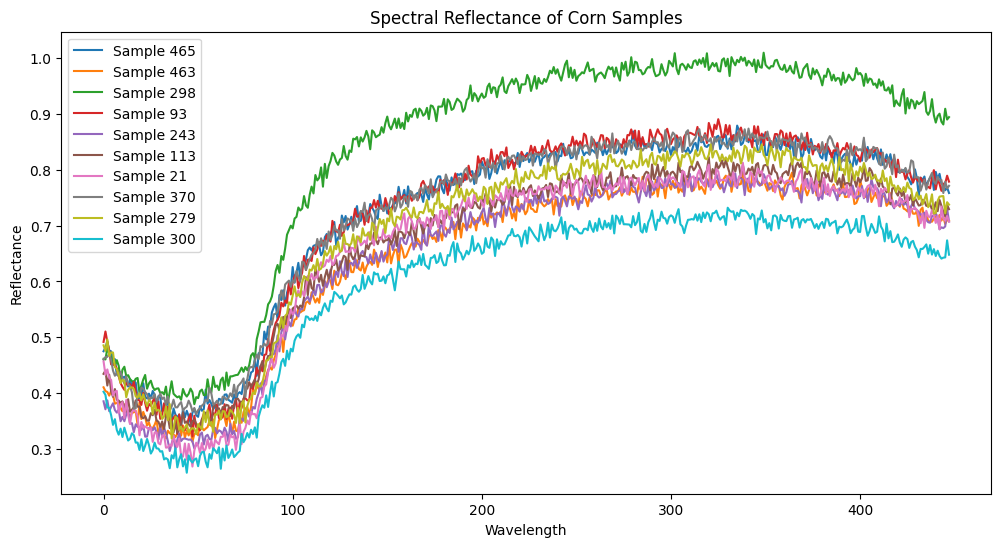

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Prediction_Ml_Project\\notebooks\\data.csv")

# Ensure 'hsi_id' is removed before converting column names
df = df.drop(columns=["hsi_id"], errors="ignore")  # Ignore if it's already removed

# Convert column names (except target) to integers
df.columns = pd.to_numeric(df.columns, errors="coerce")  # Convert valid numeric columns
df = df.dropna(axis=1)  # Drop columns that failed conversion (like target column)

# Extract features (all but last column) and target
X = df.iloc[:, :-1]  # Reflectance values
y = df.iloc[:, -1]   # Target variable (DON concentration)

# Select random samples
num_samples = 10
random_indices = np.random.choice(X.shape[0], num_samples, replace=False)

# Plot reflectance spectra
plt.figure(figsize=(12, 6))
for i in random_indices:
    plt.plot(X.columns.astype(int), X.iloc[i, :], label=f"Sample {i}")

plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.title("Spectral Reflectance of Corn Samples")
plt.legend()
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [3]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((400, 448), (400,), (100, 448), (100,))

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [6]:
X_train

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0
249,0.470113,0.478327,0.461933,0.471689,0.459936,0.440018,0.446291,0.444527,0.424547,0.425422,...,0.772226,0.767560,0.768427,0.754368,0.755416,0.777663,0.762828,0.783433,0.770387,0.776786
433,0.380274,0.385667,0.362628,0.359885,0.391311,0.360291,0.344736,0.348769,0.342885,0.358912,...,0.676712,0.665818,0.670786,0.666221,0.676347,0.687372,0.682713,0.686579,0.669462,0.681933
19,0.444575,0.432889,0.422604,0.435552,0.406021,0.376693,0.394095,0.397655,0.389030,0.383191,...,0.714755,0.707600,0.691565,0.690420,0.670859,0.679955,0.706765,0.683121,0.722853,0.690103
322,0.367682,0.377550,0.373705,0.387572,0.349443,0.359306,0.351335,0.357012,0.321357,0.356193,...,0.744561,0.754636,0.731583,0.758126,0.750360,0.733977,0.750720,0.727014,0.733357,0.736416
332,0.487195,0.505922,0.486143,0.467251,0.486389,0.448237,0.462092,0.443896,0.431145,0.422686,...,0.754947,0.761286,0.772590,0.758729,0.756892,0.766914,0.745597,0.752982,0.760312,0.769591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.426658,0.426803,0.407370,0.389059,0.399959,0.390200,0.394654,0.377715,0.374520,0.366713,...,0.715610,0.689744,0.707663,0.679728,0.701003,0.706295,0.700888,0.708041,0.675059,0.690056
270,0.476907,0.487385,0.474885,0.470448,0.437486,0.441860,0.451029,0.432723,0.407537,0.403379,...,0.783095,0.805107,0.778956,0.785390,0.797158,0.781017,0.778974,0.775492,0.778791,0.774091
348,0.331610,0.343114,0.347089,0.328483,0.336162,0.324345,0.343570,0.305119,0.293407,0.307921,...,0.606948,0.626760,0.623999,0.600295,0.617336,0.613229,0.633703,0.607825,0.615788,0.615255
435,0.385501,0.410167,0.411631,0.393021,0.375251,0.394299,0.367167,0.377055,0.366591,0.351776,...,0.718882,0.726847,0.722787,0.733782,0.720791,0.722897,0.711007,0.709964,0.705619,0.732144


In [7]:
y_scaler = StandardScaler()
import joblib
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

joblib.dump(y_scaler, "target_scaler.pkl")
y_test_scaled.shape

(100, 1)

In [8]:
from sklearn.decomposition import PCA
import joblib
pca = PCA(n_components=30)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

joblib.dump(pca, "pca.pkl")
X_train_pca.shape

(400, 30)

In [9]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the scaler for inverse transformation of y
y_scaler = joblib.load("target_scaler.pkl")

# Define basic models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

# Function to evaluate models
def evaluate_models(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Store results
model_list = []
r2_list = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train_scaled.ravel())  # Train with PCA features and standardized y

    # Predictions on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Convert predictions back to original scale
    y_train_pred_orig = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1))
    y_test_pred_orig = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1))

    # Evaluate performance
    train_mae, train_rmse, train_r2 = evaluate_models(y_train, y_train_pred_orig)
    test_mae, test_rmse, test_r2 = evaluate_models(y_test, y_test_pred_orig)

    # Store model name and R² score
    model_list.append(name)
    r2_list.append(test_r2)

    # Print results
    print(f"Model: {name}")
    print("Model Performance (Training Set)")
    print(f"- RMSE: {train_rmse:.4f}")
    print(f"- MAE: {train_mae:.4f}")
    print(f"- R² Score: {train_r2:.4f}")
    print('-' * 50)

    print("Model Performance (Test Set)")
    print(f"- RMSE: {test_rmse:.4f}")
    print(f"- MAE: {test_mae:.4f}")
    print(f"- R² Score: {test_r2:.4f}")
    print('=' * 60)
    print("\n")


Model: Linear Regression
Model Performance (Training Set)
- RMSE: 0.0000
- MAE: 0.0000
- R² Score: 1.0000
--------------------------------------------------
Model Performance (Test Set)
- RMSE: 32594.6544
- MAE: 26413.2755
- R² Score: -2.8007


Model: Lasso Regression
Model Performance (Training Set)
- RMSE: 11989.5239
- MAE: 4206.2784
- R² Score: 0.0000
--------------------------------------------------
Model Performance (Test Set)
- RMSE: 16766.1857
- MAE: 5542.1099
- R² Score: -0.0056


Model: Ridge Regression
Model Performance (Training Set)
- RMSE: 9207.4216
- MAE: 3803.6018
- R² Score: 0.4102
--------------------------------------------------
Model Performance (Test Set)
- RMSE: 12019.6551
- MAE: 4661.2468
- R² Score: 0.4832


Model: K-Neighbors Regressor
Model Performance (Training Set)
- RMSE: 8517.5633
- MAE: 2172.8850
- R² Score: 0.4953
--------------------------------------------------
Model Performance (Test Set)
- RMSE: 11176.9876
- MAE: 2937.9460
- R² Score: 0.5531


Mode

In [11]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define function to evaluate models
def evaluate_models(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Define models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

# Store results
results = {}

###  Training Without PCA
print("Training Models Without PCA")
for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled.ravel())  # Train on full feature set

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Convert predictions back to original scale
    y_train_pred_orig = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1))
    y_test_pred_orig = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1))

    # Evaluate models
    train_mae, train_rmse, train_r2 = evaluate_models(y_train, y_train_pred_orig)
    test_mae, test_rmse, test_r2 = evaluate_models(y_test, y_test_pred_orig)

    results[name + " (No PCA)"] = {"Train R²": train_r2, "Test R²": test_r2}

    # Print results
    print(f"Model: {name} (Without PCA)")
    print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print("=" * 60)


pca = PCA(n_components=3)  # Using 3 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\Training Models With PCA")
for name, model in models.items():
    model.fit(X_train_pca, y_train_scaled.ravel())  # Train on reduced feature set

    # Predictions
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)

    # Convert predictions back to original scale
    y_train_pred_orig = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1))
    y_test_pred_orig = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1))

    # Evaluate models
    train_mae, train_rmse, train_r2 = evaluate_models(y_train, y_train_pred_orig)
    test_mae, test_rmse, test_r2 = evaluate_models(y_test, y_test_pred_orig)

    results[name + " (With PCA)"] = {"Train R²": train_r2, "Test R²": test_r2}

    # Print results
    print(f"Model: {name} (With PCA)")
    print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")
    print("=" * 60)

# Compare results
import pandas as pd
df_results = pd.DataFrame(results).T
print("\n Model Performance Comparison:")
print(df_results)


<>:57: SyntaxWarning: invalid escape sequence '\T'
<>:57: SyntaxWarning: invalid escape sequence '\T'
C:\Users\hp\AppData\Local\Temp\ipykernel_10340\3324369674.py:57: SyntaxWarning: invalid escape sequence '\T'
  print("\Training Models With PCA")


Training Models Without PCA
Model: Linear Regression (Without PCA)
Train R²: 1.0000, Test R²: -2.8851
Model: Lasso Regression (Without PCA)
Train R²: 0.0000, Test R²: -0.0056
Model: Ridge Regression (Without PCA)
Train R²: 0.9249, Test R²: 0.0320
Model: KNN Regressor (Without PCA)
Train R²: 0.5239, Test R²: 0.5530
Model: Decision Tree Regressor (Without PCA)
Train R²: 1.0000, Test R²: -0.5039
\Training Models With PCA
Model: Linear Regression (With PCA)
Train R²: 0.3514, Test R²: 0.4726
Model: Lasso Regression (With PCA)
Train R²: 0.2072, Test R²: 0.2094
Model: Ridge Regression (With PCA)
Train R²: 0.3514, Test R²: 0.4725
Model: KNN Regressor (With PCA)
Train R²: 0.5305, Test R²: 0.6389
Model: Decision Tree Regressor (With PCA)
Train R²: 1.0000, Test R²: 0.9312

 Model Performance Comparison:
                                    Train R²   Test R²
Linear Regression (No PCA)          1.000000 -2.885104
Lasso Regression (No PCA)           0.000000 -0.005623
Ridge Regression (No PCA)      

In [12]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}


In [13]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5]  # Minimum samples per leaf
}


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize models
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

# Perform GridSearchCV for KNN
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train_pca, y_train_scaled.ravel())

# Perform GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train_pca, y_train_scaled.ravel())

# Get best parameters
print("Best KNN Parameters:", knn_grid_search.best_params_)
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [15]:
# Train models with best parameters
best_knn = KNeighborsRegressor(**knn_grid_search.best_params_)
best_dt = DecisionTreeRegressor(**dt_grid_search.best_params_)


best_knn.fit(X_train_pca, y_train_scaled.ravel())
best_dt.fit(X_train_pca, y_train_scaled.ravel())

# Predictions
y_knn_pred = best_knn.predict(X_test_pca)
y_dt_pred = best_dt.predict(X_test_pca)

# Evaluate models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# KNN results
knn_mae, knn_rmse, knn_r2 = evaluate(y_test_scaled, y_knn_pred)
print(f"Best KNN Model: MAE={knn_mae:.4f}, RMSE={knn_rmse:.4f}, R²={knn_r2:.4f}")

# Decision Tree results
dt_mae, dt_rmse, dt_r2 = evaluate(y_test_scaled, y_dt_pred)
print(f"Best Decision Tree Model: MAE={dt_mae:.4f}, RMSE={dt_rmse:.4f}, R²={dt_r2:.4f}")


Best KNN Model: MAE=0.2055, RMSE=0.6642, R²=0.7732
Best Decision Tree Model: MAE=0.1591, RMSE=0.3952, R²=0.9197


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define hyperparameter grid
knn_params = {
    "n_neighbors": [3],
    "weights": ["distance"],
    "metric": ["euclidean"]
}

# Initialize model
knn = KNeighborsRegressor()

# Grid Search
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train_pca, y_train_scaled.ravel())

# Best KNN model
best_knn = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)


Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = best_knn.predict(X_test_pca)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_scaled, y_pred)
mse = mean_squared_error(y_test_scaled, y_pred)
r2 = r2_score(y_test_scaled, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.1573
Mean Squared Error (MSE): 0.1254
R² Score: 0.9355


In [19]:
import numpy as np

# Example: Unseen data (replace with actual values)
unseen_sample = np.random.rand(1, 448)  # Replace with actual spectral reflectance values

# Standardize using the same scaler
unseen_sample_scaled = scaler.transform(unseen_sample)

# Apply PCA (if used in training)
unseen_sample_pca = pca.transform(unseen_sample_scaled)  # Remove if NOT using PCA

# Predict using the best KNN model
predicted_don_scaled = best_knn.predict(unseen_sample_pca)  # Use `unseen_sample_scaled` if no PCA


# Reverse standardization (get actual DON concentration)
predicted_don = y_scaler.inverse_transform(predicted_don_scaled.reshape(-1, 1))

print(f"Predicted DON Concentration: {predicted_don[0][0]:.4f}")


Predicted DON Concentration: 1618.5830


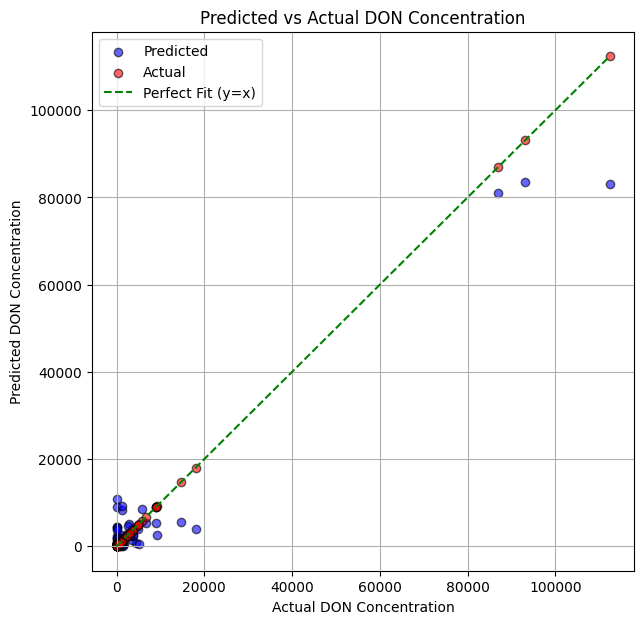

In [20]:
import matplotlib.pyplot as plt

# Predict on test set
y_pred = best_knn.predict(X_test_pca)

# Reverse standardization (if target was scaled)
y_pred_actual = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# Create plot
plt.figure(figsize=(7, 7))

# Actual vs Predicted Scatter
plt.scatter(y_test_actual, y_pred_actual, color='blue', alpha=0.6, label="Predicted", edgecolors='black')
plt.scatter(y_test_actual, y_test_actual, color='red', alpha=0.6, label="Actual", edgecolors='black')

# Perfect Fit Line
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], 
         color='green', linestyle='--', label="Perfect Fit (y=x)")

# Labels and title
plt.xlabel("Actual DON Concentration")
plt.ylabel("Predicted DON Concentration")
plt.title("Predicted vs Actual DON Concentration")
plt.legend()
plt.grid(True)

# Show plot
plt.show()
